# Tasks: 1

Build a unsupervised algorithm to cluster customer data. Write a short text of what is the key business takeaway of the recommendation.

## Step 1:- Importing required libraries

In [1]:
import pandas as pd    # for analysing the data
import numpy as np     # for comprehensive mathematical functions
import matplotlib.pyplot as plt  # to create statistic and interactive visualisation
import seaborn as sns     # to create high level interface
from datetime import date  # to instantiate date objects
import plotly.express as px  # to make publication-quality graphs
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

## Step 2:- Loading the Dataset

In [5]:
customer = pd.read_csv('marketing_campaign.csv', sep="\t")

## Step 3:- Data preprocessing

In [6]:
# First 5 data
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [7]:
# Last 5 data
customer.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [8]:
# Creating copy of the data

cus = customer.copy()
cus.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [9]:
cus.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [10]:
# Printing columns 

print("Columns in cus are :\n", cus.columns)

Columns in cus are :
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [11]:
# info

cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [13]:
# shape of the dataset

cus.shape

(2240, 29)

In [14]:
# Statistical values

cus.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### As the count of "Income" column is less, there must be null values.

In [15]:
# Finding the null values
cus.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

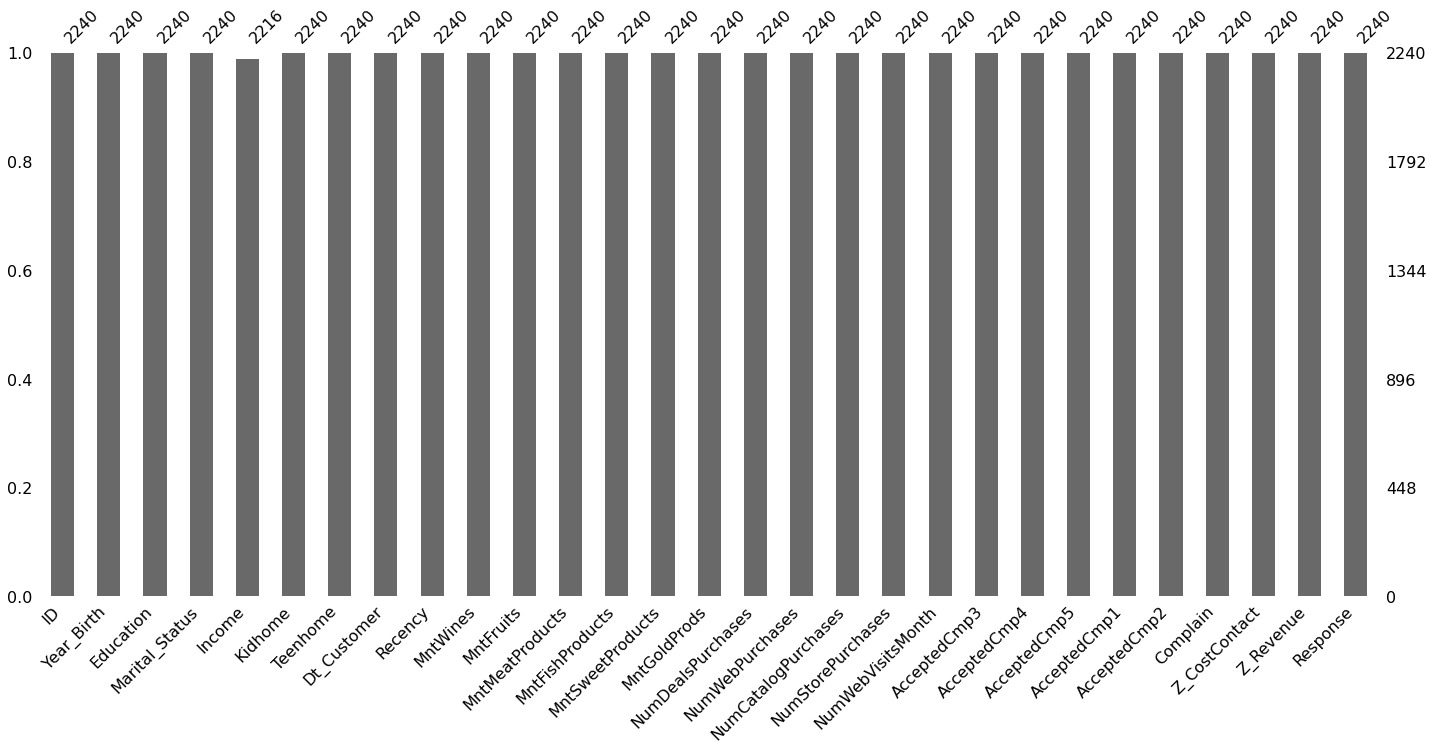

In [16]:
# visualize missing values in dataset

import missingno as msno

# values as a bar chart
msno.bar(cus)

In [17]:
# Using median value to fill null values

cus['Income']=cus['Income'].fillna(cus['Income'].median())
cus.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [18]:
# Finding usinque values in data

cus.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [19]:
# dropping the unwanted columns

cus = cus.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
cus.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0


In [20]:
# Changing category of "Education" column

cus['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [21]:
cus['Education'] = cus['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')  
cus['Education'] = cus['Education'].replace(['Basic'], 'Under Graduate')

In [22]:
cus.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Post Graduate,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Post Graduate,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Frequency Of Each Category in the Education Variable \n')

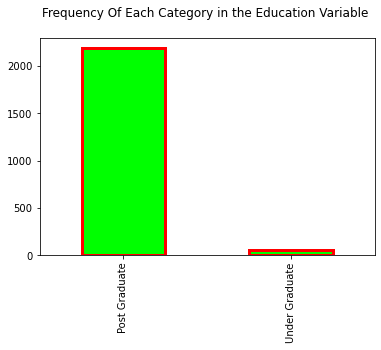

In [24]:
cus['Education'].value_counts().plot(kind='bar',color = 'lime',edgecolor = "red",linewidth = 3)

plt.title("Frequency Of Each Category in the Education Variable \n")

In [25]:
# Analysis On Marital_Status Variable
cus['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [26]:
# Regrouping the columns

cus['Marital_Status'] = cus['Marital_Status'].replace(['Married', 'Together'],'Relationship')
cus['Marital_Status'] = cus['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [27]:
print("Unique categories present in the Marital_Status:",cus['Marital_Status'].value_counts())
print("\n")

Unique categories present in the Marital_Status: Relationship    1444
Single           796
Name: Marital_Status, dtype: int64




Text(0.5, 1.0, 'Frequency Of Each Category in the Marital_Status Variable \n')

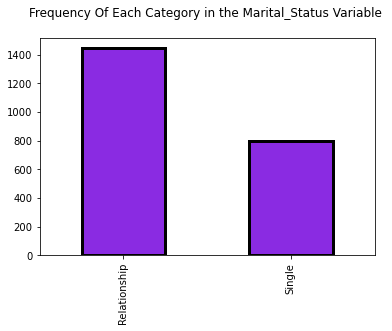

In [28]:
cus['Marital_Status'].value_counts().plot(kind='bar',color = 'Blueviolet',edgecolor = "black",linewidth = 3)

plt.title("Frequency Of Each Category in the Marital_Status Variable \n")

In [29]:
# For "Income" column

cus['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

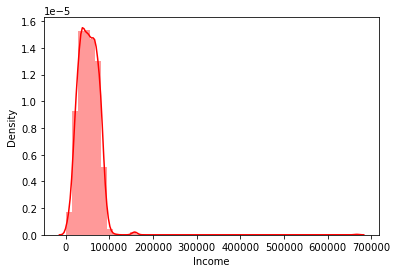

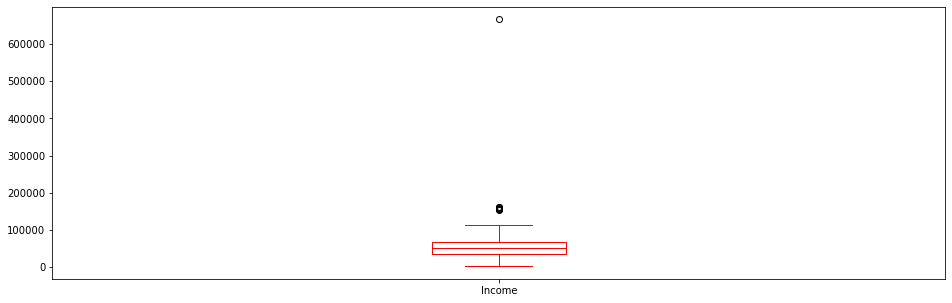

In [31]:
sns.distplot(cus["Income"],color = 'red')
plt.show()
cus["Income"].plot.box(figsize=(16,5),color = 'red')
plt.show()

In [32]:
# Combining different dataframe into a single column to reduce the number of dimension

cus['Kids'] = cus['Kidhome'] + cus['Teenhome']

Text(0.5, 1.0, 'Frequency Of Each Category in the Kids Variable \n')

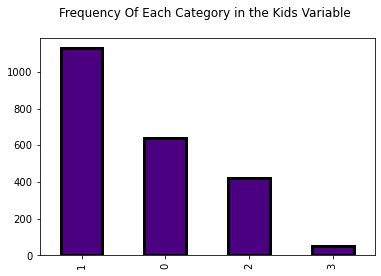

In [33]:
cus['Kids'].value_counts().plot(kind='bar',color = 'indigo',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Kids Variable \n")

In [34]:
cus['Kids'].value_counts()

1    1128
0     638
2     421
3      53
Name: Kids, dtype: int64

In [37]:
# Combining different dataframe into a single column to reduce the number of dimension

cus['Expenses'] = cus['MntWines'] + cus['MntFruits'] + cus['MntMeatProducts'] + cus['MntFishProducts'] + cus['MntSweetProducts'] + cus['MntGoldProds']
cus['Expenses'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Expenses, dtype: int64

In [38]:
cus['Expenses'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Expenses, dtype: float64

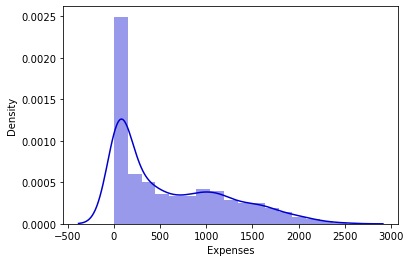

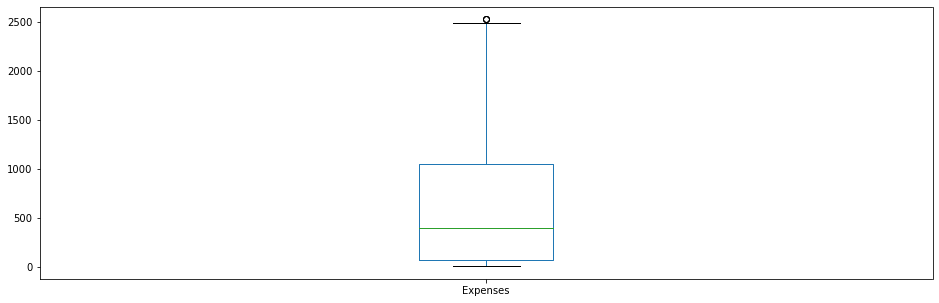

In [39]:
sns.distplot(cus["Expenses"],color = 'mediumblue')
plt.show()
cus["Expenses"].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 1.0, 'Frequency Of Each Category in the TotalAcceptedCmp Variable \n')

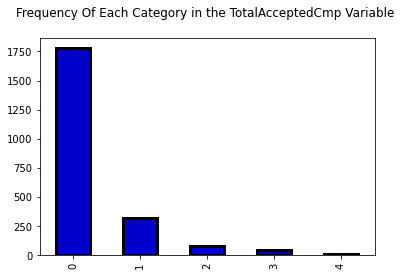

In [40]:
cus['TotalAcceptedCmp'] = cus['AcceptedCmp1'] + cus['AcceptedCmp2'] + cus['AcceptedCmp3'] + cus['AcceptedCmp4'] + cus['AcceptedCmp5']

cus['TotalAcceptedCmp'].value_counts().plot(kind='bar',color = 'mediumblue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the TotalAcceptedCmp Variable \n")

In [41]:
cus['NumTotalPurchases'] = cus['NumWebPurchases'] + cus['NumCatalogPurchases'] + cus['NumStorePurchases'] + cus['NumDealsPurchases']
cus['NumTotalPurchases'].unique()
cus['NumTotalPurchases'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: NumTotalPurchases, dtype: float64

In [42]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
cus = cus.drop(columns=col_del,axis=1)

In [43]:
cus.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,1957,Post Graduate,Single,58138.0,04-09-2012,58,0,1,0,1617,0,25
1,1954,Post Graduate,Single,46344.0,08-03-2014,38,0,0,2,27,0,6
2,1965,Post Graduate,Relationship,71613.0,21-08-2013,26,0,0,0,776,0,21
3,1984,Post Graduate,Relationship,26646.0,10-02-2014,26,0,0,1,53,0,8
4,1981,Post Graduate,Relationship,58293.0,19-01-2014,94,0,0,1,422,0,19


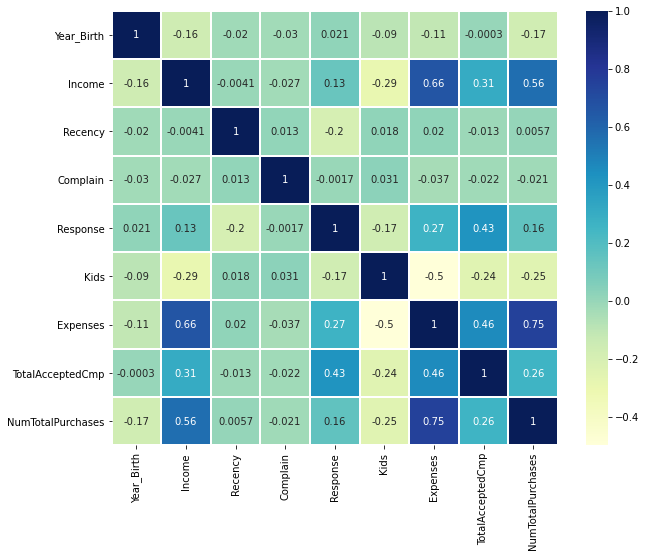

In [44]:
# Finding coorelation

plt.figure(figsize=(10,8))
sns.heatmap(cus.corr(), annot=True,cmap = 'YlGnBu',linewidths=1)
plt.show()

In [46]:
# Types of data 
cus.dtypes

Year_Birth             int64
Education             object
Marital_Status        object
Income               float64
Dt_Customer           object
Recency                int64
Complain               int64
Response               int64
Kids                   int64
Expenses               int64
TotalAcceptedCmp       int64
NumTotalPurchases      int64
dtype: object

In [48]:
# Changing into datetime for "Dt_Customer" column

cus['Dt_Customer'] = pd.to_datetime(cus.Dt_Customer)
cus['First_day'] = '01-01-2015'
cus['First_day'] = pd.to_datetime(cus.First_day)
cus['Day_engaged'] = (cus['First_day'] - cus['Dt_Customer']).dt.days

In [49]:
# Adding "Age"

cus['Age'] = (pd.Timestamp('now').year) - (pd.to_datetime(cus['Dt_Customer']).dt.year)
cus['Age'].value_counts()

8    1189
7     557
9     494
Name: Age, dtype: int64

In [50]:
# Dropping less related columns
cus = cus.drop(columns=["Dt_Customer", "First_day", "Year_Birth", "Dt_Customer", "Recency", "Complain","Response"],axis=1)

In [51]:
# Exploring different types of data individually

obj = []
for i in cus.columns:
    if (cus[i].dtypes == "object"):
        obj.append(i)

print(" Object are:",obj)

 Object are: ['Education', 'Marital_Status']


In [52]:
Int = []
for i in cus.columns:
    if (cus[i].dtypes == "int64"):
        Int.append(i)

print(" Integers are:",Int)

 Integers are: ['Kids', 'Expenses', 'TotalAcceptedCmp', 'NumTotalPurchases', 'Day_engaged', 'Age']


In [53]:
Float = []
for i in cus.columns:
    if (cus[i].dtypes == "float64"):
        Float.append(i)

print("Float are:",Float)

Float are: ['Income']


In [54]:
# Converting the labels into a numeric form

from sklearn.preprocessing import LabelEncoder
lbl_encode = LabelEncoder()
for i in obj:
    cus[i]=cus[[i]].apply(lbl_encode.fit_transform)

In [55]:
# Removing the mean and scales each feature/variable to unit variance,

cus1 = cus.copy()

In [56]:
from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit_transform(cus1.values)
sf_df = pd.DataFrame(scaled_features, index=cus1.index, columns=cus1.columns)

# Step 4:- K-Means Clustering

In [60]:
X = sf_df.iloc[:, [7, 4]].values
print(X)

[[ 1.97674456  1.67941681]
 [-1.66701074 -0.96127545]
 [-0.17246808  0.28267329]
 ...
 [-0.84867327  1.05495122]
 [-0.84436623  0.39394775]
 [ 1.16271412 -0.7204576 ]]


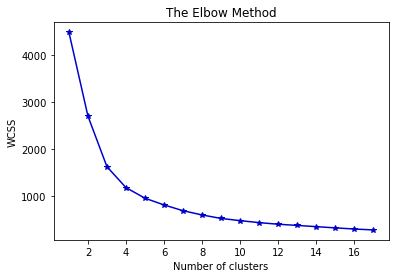

In [61]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 18), wcss,color = "mediumblue",marker = '*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 50)
y_kmeans = kmeans.fit_predict(X)

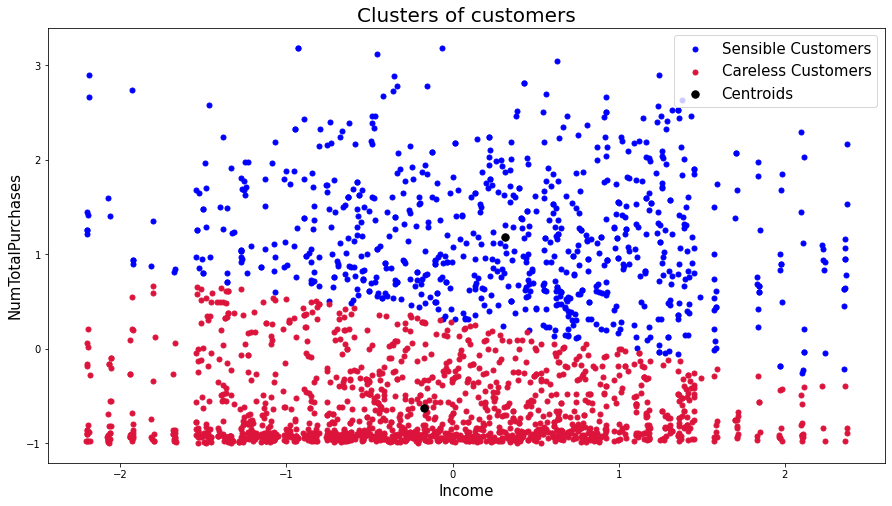

In [63]:
# Visualising the clusters

plt.figure(figsize= (15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'blue', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'crimson', label = 'Careless Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 55, c = 'black', label = 'Centroids')
plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('NumTotalPurchases',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

### Observation:- We can recommend the business to the Customers with more number of purchases and who has stable income. We can target the customers who visits the store in regular basis and have the product of their choice available. This will make them to purchase more, which will lead us to have more income and customers.

# Task 2:- 
Build a classification model (binomial or multinomial - recommended: xgboost python implementation) on the promotion done by the company. Run SHAP analysis on the model results, and write a short text of what would be your recommendation to business for the next round of campaigns.

In [66]:
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [69]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["ID","Year_Birth" , "Education", "Marital_Status" , "Income","Kidhome","Teenhome", "Dt_Customer","Recency","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Complain", "Z_CostContact", "Z_Revenue"]
customer = customer.drop(columns=col_del,axis=1)

In [71]:
customer.columns

Index(['NumDealsPurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response'],
      dtype='object')

In [72]:
from sklearn.model_selection import train_test_split

In [75]:
X= customer.iloc[:, [0,1,2,3,4,5]]
Y= customer.iloc[:,6]

In [76]:
X

,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,3,0,0,0,0,0
1,2,0,0,0,0,0
2,1,0,0,0,0,0
3,2,0,0,0,0,0
4,5,0,0,0,0,0
5,2,0,0,0,0,0
6,4,0,0,0,0,0
7,2,0,0,0,0,0
8,1,0,0,0,0,0
9,1,1,0,0,0,0


In [81]:
input_cols=['NumDealsPurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2']
target_col=['Response']

In [82]:
input_x = customer[input_cols].copy()
target_x = customer[target_col].copy()

In [77]:
## Gradient Boosting

from xgboost import XGBRegressor

In [78]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=1500, max_depth=5)

In [83]:
%%time
model.fit(X, target_x)

Wall time: 517 ms


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
# Prediction

pred=model.predict(X)
pred

array([0.10967767, 0.05412042, 0.07299966, ..., 0.04703674, 0.05412042,
       0.10967767], dtype=float32)

In [86]:
test_preds = model.predict(input_x)
test_preds

array([0.10967767, 0.05412042, 0.07299966, ..., 0.04703674, 0.05412042,
       0.10967767], dtype=float32)